<a href="https://colab.research.google.com/github/ganjbakhshali/cfar_10_torch/blob/main/cfar_10_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.optim.lr_scheduler as lr_scheduler
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch.optim as optim


In [ ]:
##model
# Set the device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)  # Batch Normalization
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)  # Batch Normalization
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))  # Apply Batch Normalization after activation
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  # Apply Batch Normalization after activation
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Transformations for the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [ ]:
# Load CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Load CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Initialize the model, loss function, and optimizer

net = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-5)
# optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=1e-5)
#

In [ ]:

# Training loop
epochs = 20
train_losses, test_losses, accuracies = [], [], []

for epoch in range(epochs):
    net.train()
    running_loss = 0.0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    net.eval()
    test_loss = 0.0
    correct = 0

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = net(images)
            test_loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()

    avg_train_loss = running_loss / len(train_loader)
    avg_test_loss = test_loss / len(test_loader)
    accuracy = correct / len(test_dataset) * 100.0

    print(f'Epoch {epoch + 1}/{epochs}, '
          f'Training Loss: {avg_train_loss:.4f}, '
          f'Test Loss: {avg_test_loss:.4f}, '
          f'Accuracy: {accuracy:.2f}%')

    train_losses.append(avg_train_loss)
    test_losses.append(avg_test_loss)
    accuracies.append(accuracy)




Epoch 1/20, Training Loss: 1.4427, Test Loss: 1.1833, Accuracy: 57.20%
Epoch 2/20, Training Loss: 1.0689, Test Loss: 1.0326, Accuracy: 63.05%
Epoch 3/20, Training Loss: 0.9437, Test Loss: 0.9508, Accuracy: 66.44%
Epoch 4/20, Training Loss: 0.8589, Test Loss: 0.8923, Accuracy: 69.14%
Epoch 5/20, Training Loss: 0.7999, Test Loss: 0.8728, Accuracy: 69.97%
Epoch 6/20, Training Loss: 0.7406, Test Loss: 0.8479, Accuracy: 70.75%
Epoch 7/20, Training Loss: 0.6954, Test Loss: 0.8125, Accuracy: 71.97%
Epoch 8/20, Training Loss: 0.6443, Test Loss: 0.8125, Accuracy: 71.79%
Epoch 9/20, Training Loss: 0.6005, Test Loss: 0.7963, Accuracy: 72.62%
Epoch 10/20, Training Loss: 0.5603, Test Loss: 0.8010, Accuracy: 72.59%
Epoch 11/20, Training Loss: 0.5184, Test Loss: 0.8058, Accuracy: 72.98%
Epoch 12/20, Training Loss: 0.4829, Test Loss: 0.8189, Accuracy: 73.01%
Epoch 13/20, Training Loss: 0.4450, Test Loss: 0.8058, Accuracy: 72.99%
Epoch 14/20, Training Loss: 0.4120, Test Loss: 0.7954, Accuracy: 73.77%
E

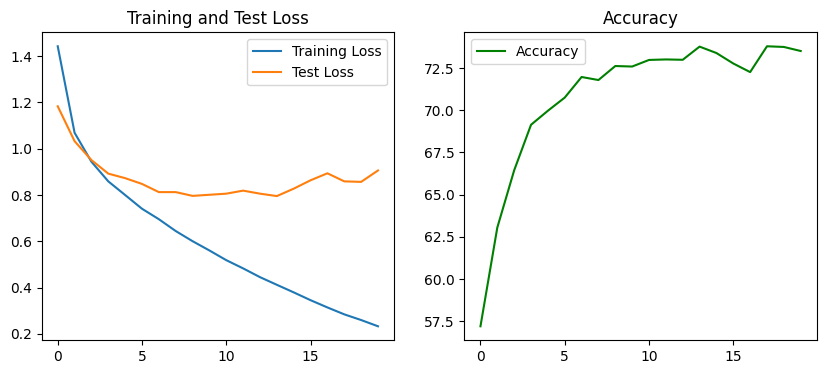

In [ ]:
# Plotting
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.title('Training and Test Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Accuracy', color='green')
plt.legend()
plt.title('Accuracy')

plt.show()